In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Extract and Load data from Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Bird Strikes/Bird Strikes data.xlsx'
df = pd.read_excel(file_path)
df.head()


Mounted at /content/drive


,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,1195,Airplane,BARKSDALE AIR FORCE BASE ARPT,> 1000 ft,B-52H,2 to 10,9,NaN,2002-11-13,No damage,...,False,None.,Medium,Overcast,Unknown bird or bat,Y,0,2000.0,0,No
1,3019,Airplane,EDWARDS AIR FORCE BASE,< 1000 ft,T-38A,1,1,Precautionary Landing,2002-10-10,No damage,...,False,NaN,Medium,No Cloud,Unknown bird or bat,Y,0,400.0,0,No
2,3500,Airplane,BARKSDALE AIR FORCE BASE ARPT,< 1000 ft,B-52H,1,1,Precautionary Landing,2001-05-15,No damage,...,False,NaN,Medium,No Cloud,Unknown bird or bat,Y,0,1000.0,0,No
3,3504,Airplane,BARKSDALE AIR FORCE BASE ARPT,> 1000 ft,B-52H,2 to 10,8,Precautionary Landing,2001-05-23,No damage,...,False,NaN,Medium,No Cloud,Unknown bird or bat,Y,0,1800.0,0,No
4,3597,Airplane,SHEPPARD AIR FORCE BASE,< 1000 ft,AT-38B,1,1,NaN,2001-04-18,No damage,...,True,NaN,Small,Some Cloud,Upland sandpiper,Y,0,200.0,0,No


In [ ]:
# EDA
df.shape

(25429, 21)

In [ ]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [ ]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,FlightDate,Cost: Total $,Feet above ground,Number of people injured
count,25558.000000,25558.000000,25429,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,2007-01-22 13:20:40.017303040,5.567354e+03,799.028432,0.001056
min,1195.000000,1.000000,2000-01-02 00:00:00,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,2004-06-17 00:00:00,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,2007-07-29 00:00:00,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,2009-11-01 00:00:00,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,2011-12-31 00:00:00,1.239775e+07,18000.000000,6.000000
std,38510.453382,12.793975,NaN,1.219713e+05,1740.079843,0.050420


In [ ]:
# Data Cleaning
df = df.drop(columns=['Remarks', 'Wildlife: Number struck', 'Remains of wildlife collected?', 'Remains of wildlife sent to Smithsonian', 'Wildlife: Species', 'Wildlife: Size'])
df = df.dropna(subset=['Aircraft: Type', 'Airport: Name', 'Altitude bin', 'FlightDate', 'Aircraft: Airline/Operator', 'When: Phase of flight', 'Pilot warned of birds or wildlife?', 'Feet above ground', 'Is Aircraft Large?'])

In [ ]:
df['Year'] = pd.DatetimeIndex(df['FlightDate']).year
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Origin State,When: Phase of flight,Conditions: Precipitation,Conditions: Sky,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,1195,Airplane,BARKSDALE AIR FORCE BASE ARPT,> 1000 ft,B-52H,9,NaN,2002-11-13,No damage,NaN,...,Arizona,Approach,NaN,Overcast,Y,0,2000.0,0,No,2002
1,3019,Airplane,EDWARDS AIR FORCE BASE,< 1000 ft,T-38A,1,Precautionary Landing,2002-10-10,No damage,NaN,...,Hawaii,Climb,NaN,No Cloud,Y,0,400.0,0,No,2002
2,3500,Airplane,BARKSDALE AIR FORCE BASE ARPT,< 1000 ft,B-52H,1,Precautionary Landing,2001-05-15,No damage,NaN,...,Florida,Approach,NaN,No Cloud,Y,0,1000.0,0,No,2001
3,3504,Airplane,BARKSDALE AIR FORCE BASE ARPT,> 1000 ft,B-52H,8,Precautionary Landing,2001-05-23,No damage,NaN,...,Alabama,Approach,NaN,No Cloud,Y,0,1800.0,0,No,2001
4,3597,Airplane,SHEPPARD AIR FORCE BASE,< 1000 ft,AT-38B,1,NaN,2001-04-18,No damage,NaN,...,Florida,Approach,NaN,Some Cloud,Y,0,200.0,0,No,2001


In [ ]:
# Transform the data into a new Excel file
updated_file_path = '/content/drive/My Drive/Bird Strikes/Updated Bird Strikes data.xlsx'
df.to_excel(updated_file_path, index=False)

In [ ]:
# Total Number of Bird Strikes
df['Wildlife: Number Struck Actual'].sum()

68649

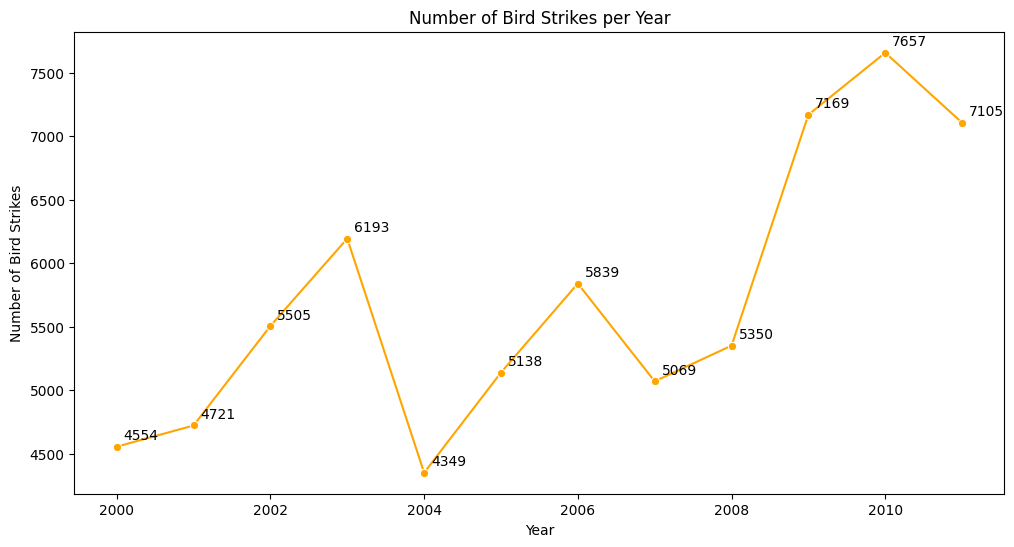

In [ ]:
# Data Visualization of Yearly Bird Strikes
yearly_strikes = df.groupby('Year')['Wildlife: Number Struck Actual'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_strikes, x='Year', y='Wildlife: Number Struck Actual', marker='o', color='orange')
for x, y in zip(yearly_strikes['Year'], yearly_strikes['Wildlife: Number Struck Actual']):
  plt.annotate(f'{y}', xy=(x, y), xytext=(5, 5), textcoords='offset points')
plt.title('Number of Bird Strikes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.show()

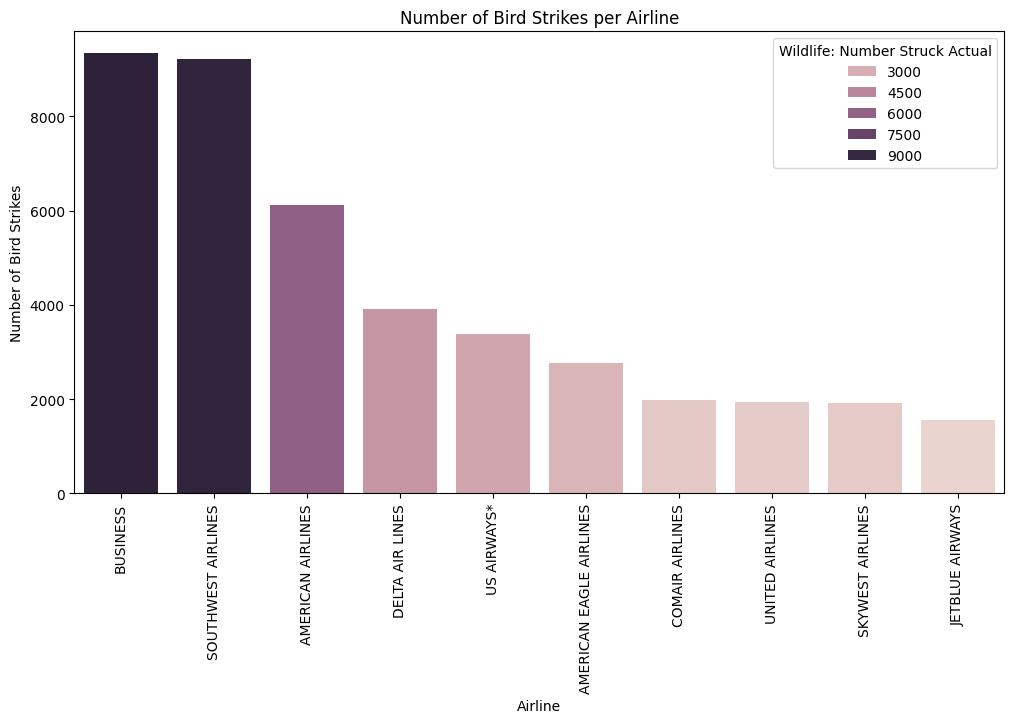

In [ ]:
# Top 10 Airlines in terms of encountering bird strikes
airlines = df.groupby('Aircraft: Airline/Operator')['Wildlife: Number Struck Actual'].sum().reset_index()
top_airlines = airlines.nlargest(10, 'Wildlife: Number Struck Actual')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_airlines, x='Aircraft: Airline/Operator', y='Wildlife: Number Struck Actual', hue='Wildlife: Number Struck Actual')
plt.title('Number of Bird Strikes per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=90)
plt.show()

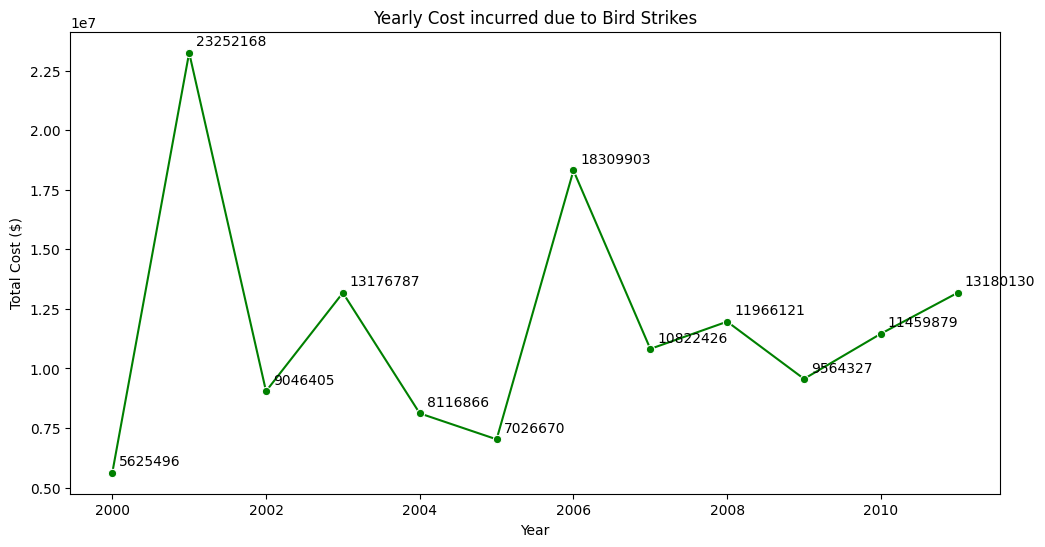

In [ ]:
# Yearly Cost Incurred due to Bird Strikes
yearly_cost = df.groupby('Year')['Cost: Total $'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_cost, x='Year', y='Cost: Total $', marker='o', color='green')
for x, y in zip(yearly_cost['Year'], yearly_cost['Cost: Total $']):
  plt.annotate(f'{y}', xy=(x, y), xytext=(5, 5), textcoords='offset points')
plt.title('Yearly Cost incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()

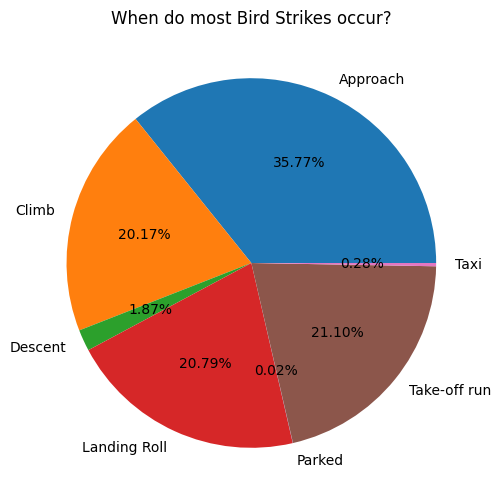

In [ ]:
# When do most Bird Strikes occur?
when_strikes = df.groupby('When: Phase of flight')['Wildlife: Number Struck Actual'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.pie(data=when_strikes, x='Wildlife: Number Struck Actual', labels='When: Phase of flight', autopct='%1.2f%%')
plt.title('When do most Bird Strikes occur?')
plt.show()

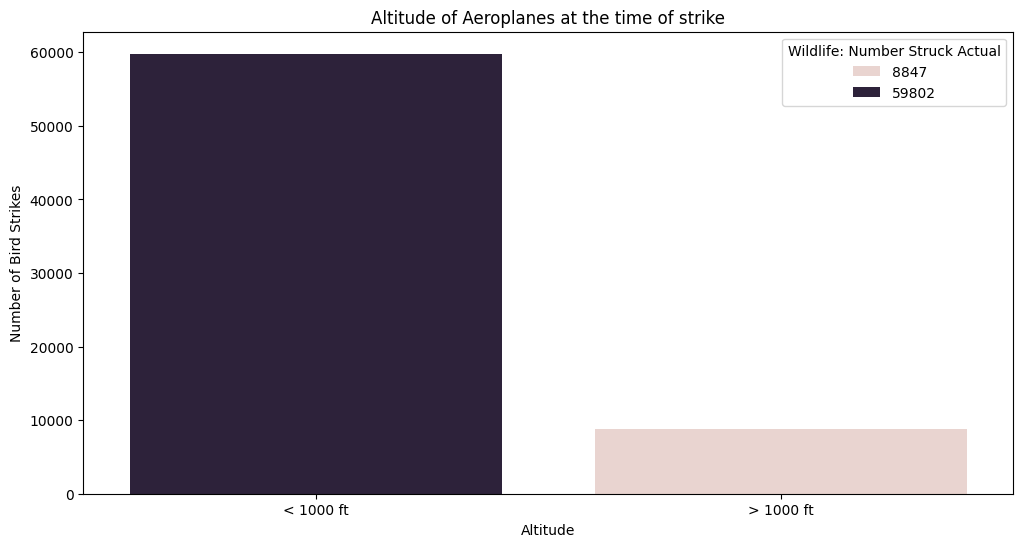

In [ ]:
# Altitude of Aeroplanes at the time of strike
altitude = df.groupby('Altitude bin')['Wildlife: Number Struck Actual'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=altitude, x='Altitude bin', y='Wildlife: Number Struck Actual', hue='Wildlife: Number Struck Actual')
plt.title('Altitude of Aeroplanes at the time of strike')
plt.xlabel('Altitude')
plt.ylabel('Number of Bird Strikes')
plt.show()

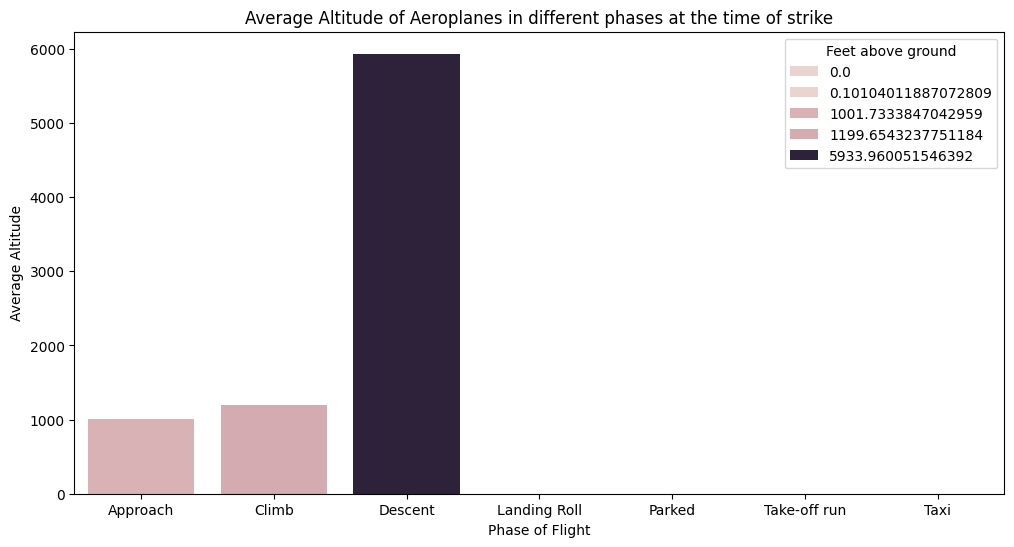

In [ ]:
# Average altitude of Aeroplanes in different phases at the time of strike
average_altitude = df.groupby('When: Phase of flight')['Feet above ground'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=average_altitude, x='When: Phase of flight', y='Feet above ground', hue='Feet above ground')
plt.title('Average Altitude of Aeroplanes in different phases at the time of strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude')
plt.show()

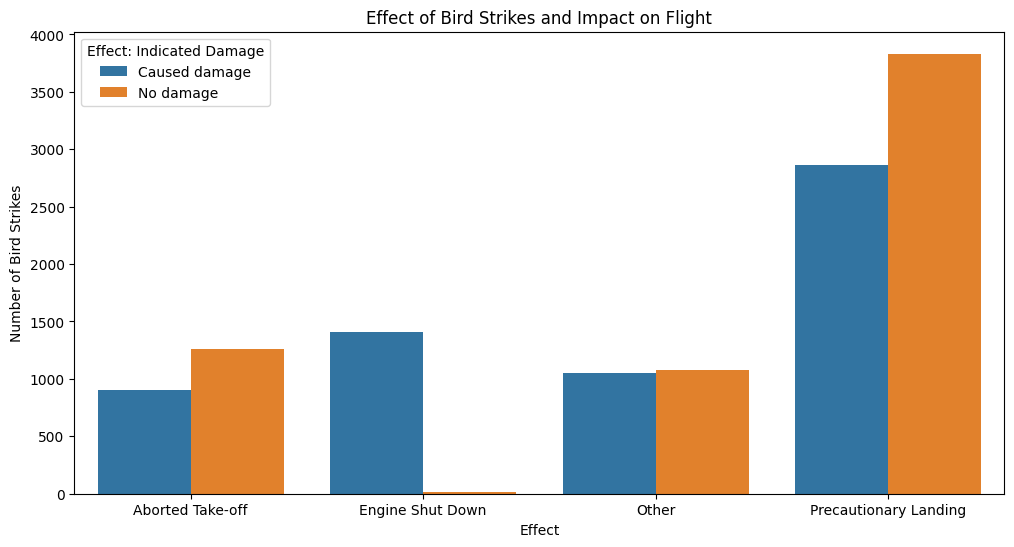

In [ ]:
# Effect of Bird Strikes and Impact on Flight
bird_impact = df.groupby(['Effect: Indicated Damage', 'Effect: Impact to flight'])['Wildlife: Number Struck Actual'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=bird_impact, x='Effect: Impact to flight', y='Wildlife: Number Struck Actual', hue='Effect: Indicated Damage')
plt.title('Effect of Bird Strikes and Impact on Flight')
plt.xlabel('Effect')
plt.ylabel('Number of Bird Strikes')
plt.show()

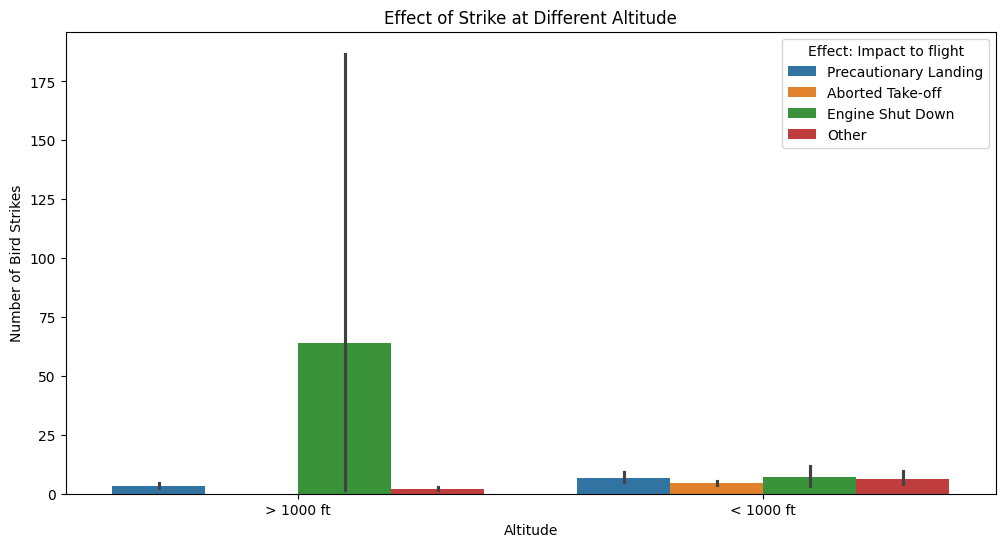

In [ ]:
# Effect of Strike at Different Altitude
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Altitude bin', y='Wildlife: Number Struck Actual', hue='Effect: Impact to flight')
plt.title('Effect of Strike at Different Altitude')
plt.xlabel('Altitude')
plt.ylabel('Number of Bird Strikes')
plt.show()

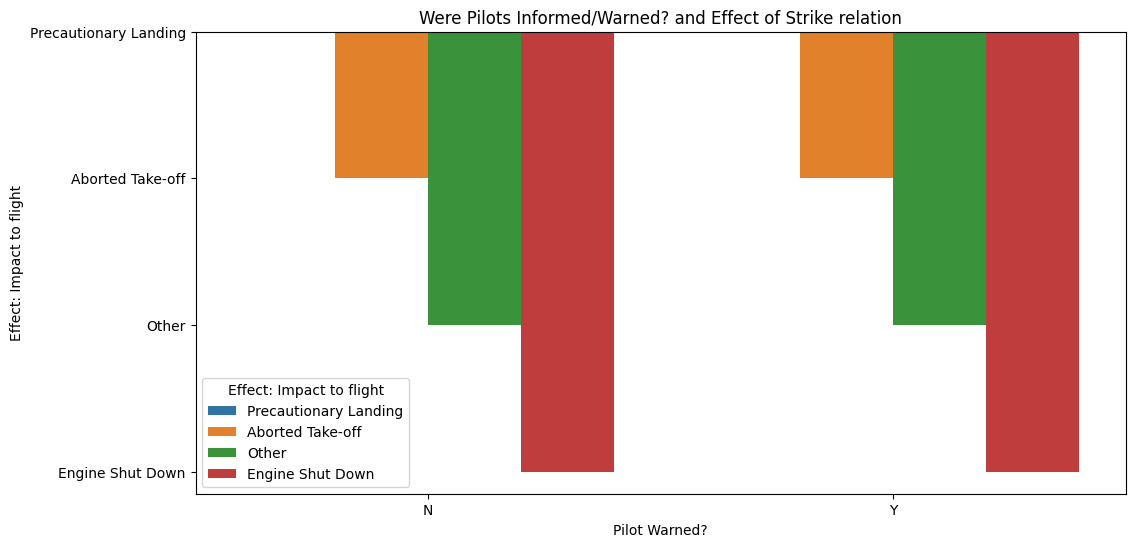

In [ ]:
# Were Pilots Informed/Warned? and Effect of Strike relation
pilot_warning = df.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=pilot_warning, x='Pilot warned of birds or wildlife?', y='Effect: Impact to flight', hue='Effect: Impact to flight')
plt.title('Were Pilots Informed/Warned? and Effect of Strike relation')
plt.xlabel('Pilot Warned?')
plt.ylabel('Effect: Impact to flight')
plt.show()

**Using SQL**

In [ ]:
# We can Analyse the data using SQL
# Install necessary libraries
!pip install sqlalchemy
!pip install ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.1 MB/s eta 0:00:00


In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('bird_strikes.db')

In [ ]:
%load_ext sql

In [ ]:
con = sqlite3.connect("bird_strikes.db")
cur = con.cursor()

In [ ]:
%sql sqlite:///bird_strikes.db

In [ ]:
df.to_sql("birdstrikes", con, if_exists='replace')

25429

In [ ]:
# Total number of bird strikes
%sql select sum("Wildlife: Number Struck Actual") as "Total Bird Strikes" from birdstrikes

 * sqlite:///bird_strikes.db
Done.


Total Bird Strikes
68649


In [ ]:
# Yearly Analysis of Bird Strikes
%sql select Year, sum("Wildlife: Number Struck Actual") as "No. of Bird Strikes" from birdstrikes group by Year

 * sqlite:///bird_strikes.db
Done.


Year,No. of Bird Strikes
2000,4554
2001,4721
2002,5505
2003,6193
2004,4349
2005,5138
2006,5839
2007,5069
2008,5350
2009,7169


In [ ]:
# Top 10 US Airlines in terms of having encountered bird strikes
%sql select "Aircraft: Airline/Operator" as Airlines, sum("Wildlife: Number Struck Actual") as "No. of Bird Strikes" from birdstrikes group by "Aircraft: Airline/Operator" order by "No. of Bird Strikes" desc limit 10

 * sqlite:///bird_strikes.db
Done.


Airlines,No. of Bird Strikes
BUSINESS,9331
SOUTHWEST AIRLINES,9208
AMERICAN AIRLINES,6107
DELTA AIR LINES,3911
US AIRWAYS*,3377
AMERICAN EAGLE AIRLINES,2763
COMAIR AIRLINES,1986
UNITED AIRLINES,1930
SKYWEST AIRLINES,1920
JETBLUE AIRWAYS,1562


In [ ]:
# Top 50 Airports with most incidents of bird strikes
%sql select "Airport: Name" as Airports, sum("Wildlife: Number Struck Actual") as "No. of Bird Strikes" from birdstrikes group by "Airport: Name" order by "No. of Bird Strikes" desc limit 50

 * sqlite:///bird_strikes.db
Done.


Airports,No. of Bird Strikes
DALLAS/FORT WORTH INTL ARPT,2933
SACRAMENTO INTL,1856
LAGUARDIA NY,1579
PHILADELPHIA INTL,1396
SALT LAKE CITY INTL,1376
SAN FRANCISCO INTL ARPT,1210
JOHN F KENNEDY INTL,1207
SEATTLE-TACOMA INTL,1181
NORFOLK INTL,1119
BALTIMORE WASH INTL,1027


In [ ]:
# Yearly cost incurred due to bird strikes
%sql select Year, sum("Cost: Total $") as "Yearly Cost $" from birdstrikes group by Year

 * sqlite:///bird_strikes.db
Done.


Year,Yearly Cost $
2000,5625496
2001,23252168
2002,9046405
2003,13176787
2004,8116866
2005,7026670
2006,18309903
2007,10822426
2008,11966121
2009,9564327


In [ ]:
# Altitude of aeroplanes at the time of strike
%sql select "Altitude bin" as Altitude, sum("Wildlife: Number Struck Actual") as "No. of Bird Strikes" from birdstrikes group by "Altitude" order by "No. of Bird Strikes" desc

 * sqlite:///bird_strikes.db
Done.


Altitude,No. of Bird Strikes
< 1000 ft,59802
> 1000 ft,8847


In [ ]:
# Phase of flight at the time of the strike
%sql select "When: Phase of flight" as "Phase of Flight", sum("Wildlife: Number Struck Actual") as "No. of Bird Strikes" from birdstrikes group by "When: Phase of flight" order by "No. of Bird Strikes" desc

 * sqlite:///bird_strikes.db
Done.


Phase of Flight,No. of Bird Strikes
Approach,24558
Take-off run,14482
Landing Roll,14270
Climb,13846
Descent,1285
Taxi,195
Parked,13


In [ ]:
# Average Altitude of the aeroplanes in different phases at the time of strike
%sql select "When: Phase of flight", round(avg("Feet above ground"), 2) as "Average Altitude" from birdstrikes group by "When: Phase of flight" order by "Average Altitude" desc

 * sqlite:///bird_strikes.db
Done.


When: Phase of flight,Average Altitude
Descent,5933.96
Climb,1199.65
Approach,1001.73
Take-off run,0.1
Taxi,0.0
Parked,0.0
Landing Roll,0.0


In [ ]:
# Effect of Bird Strike and Impact on Flight
%sql select "Effect: Indicated Damage" as "Indicated Damage", "Effect: Impact to flight" as "Impact to flight", sum("Wildlife: Number Struck Actual") as "No. of Bird Strikes" from birdstrikes group by "Indicated Damage", "Impact to flight" order by "No. of Bird Strikes" desc

 * sqlite:///bird_strikes.db
Done.


Indicated Damage,Impact to flight,No. of Bird Strikes
No damage,None,50928
Caused damage,None,5318
No damage,Precautionary Landing,3832
Caused damage,Precautionary Landing,2859
Caused damage,Engine Shut Down,1406
No damage,Aborted Take-off,1258
No damage,Other,1077
Caused damage,Other,1055
Caused damage,Aborted Take-off,901
No damage,Engine Shut Down,15


In [ ]:
# Effect of Strike at Different Altitude
%sql select "Altitude bin" as Altitude, "Effect: Impact to flight" as "Impact to flight", sum("Wildlife: Number Struck Actual") as "No. of Bird Strikes" from birdstrikes group by "Altitude", "Impact to flight" order by "No. of Bird Strikes" desc

 * sqlite:///bird_strikes.db
Done.


Altitude,Impact to flight,No. of Bird Strikes
< 1000 ft,None,49283
> 1000 ft,None,6963
< 1000 ft,Precautionary Landing,5879
< 1000 ft,Aborted Take-off,2159
< 1000 ft,Other,1955
> 1000 ft,Engine Shut Down,895
> 1000 ft,Precautionary Landing,812
< 1000 ft,Engine Shut Down,526
> 1000 ft,Other,177


In [ ]:
# Were Pilots informed/warned? and Effect of Strike relation
%sql select "Pilot warned of birds or wildlife?" as "Pilot Warned?", "Effect: Impact to flight" as "Impact to flight", sum("Wildlife: Number Struck Actual") as "No. of Bird Strikes" from birdstrikes group by "Pilot Warned?", "Impact to flight" order by "No. of Bird Strikes" desc

 * sqlite:///bird_strikes.db
Done.


Pilot Warned?,Impact to flight,No. of Bird Strikes
N,None,30538
Y,None,25708
Y,Precautionary Landing,3815
N,Precautionary Landing,2876
N,Aborted Take-off,1167
N,Engine Shut Down,1144
Y,Other,1068
N,Other,1064
Y,Aborted Take-off,992
Y,Engine Shut Down,277


In [ ]:
!jupyter nbconvert --to html '/content/drive/My Drive/Bird Strikes/Data Visualization of Bird Strikes.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Bird Strikes/Data Visualization of Bird Strikes.ipynb to pdf
[NbConvertApp] ERROR | Error while converting '/content/drive/MyDrive/Bird Strikes/Data Visualization of Bird Strikes.ipynb'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 488, in export_single_notebook
    output, resources = self.exporter.from_filename(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/exporters/exporter.py", line 189, in from_filename
    return self.from_file(f, resources=resources, **kw)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/exporters/exporter.py", line 206, in from_file
    return self.from_notebook_node(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/exporters/pdf.py", line 181, in from_notebook_node
    latex, resources = super().from_notebook_node(nb, resources=resources, **kw)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/ex